In [51]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [52]:
# Load dataset
train_images = np.load("task7_X_train.npy")
train_labels = np.load("task7_y_train.npy")
test_images = np.load("task7_X_test.npy")
test_labels = np.load("task7_y_test.npy")

print("Train images' shape:", train_images.shape)
print("Min:", train_images.min())
print("Max:", train_images.max())

Train images' shape: (4138, 224, 224, 3)
Min: -123.68
Max: 151.061


In [53]:
# Normalize pixel values to be between 0 and 1
def normalize(images):
    return (images + 123.68)/274.75

train_images = normalize(train_images)
test_images = normalize(test_images)

print("Train images' shape:", train_images.shape)
print("Min:", train_images.min())
print("Max:", train_images.max())

Train images' shape: (4138, 224, 224, 3)
Min: 0.0
Max: 0.9999672


In [54]:
# Reformat the labels to be 0-3 instead of [1, 0, 0, 0]-[0, 0, 0, 1]
def re_format(old_labels):
    labels = np.zeros((old_labels.shape[0], 1))
    for i in range(len(old_labels)):
        for j in range(len(old_labels[i])):
            if old_labels[i][j] == 1:
                labels[i] = j
                break
    return labels

train_labels = re_format(train_labels)
test_labels = re_format(test_labels)

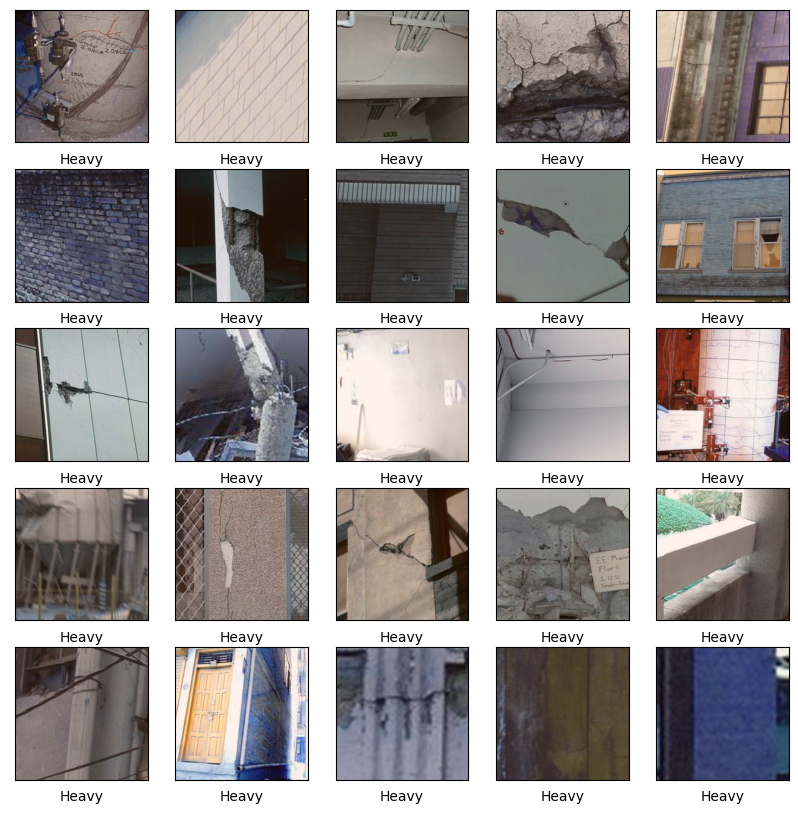

In [55]:
# Validate dataset
import random

label_names = ["Heavy", "Minor", "Moderate", "Undamaged"]
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    rand_int = random.randrange(len(train_images))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[rand_int])
    # get label index to convert into label name
    label_index = 0
    for j in range(len(train_labels[rand_int])):
        if train_labels[rand_int][j] == 1:
            label_index = j
            break
    plt.xlabel(label_names[j])

plt.show()

In [56]:
# Setup model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 26, 26, 64)       

In [57]:
epochs = 10

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=epochs, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
 15/130 [==>...........................] - ETA: 1:04 - loss: 1.4100 - accuracy: 0.3625

KeyboardInterrupt: 

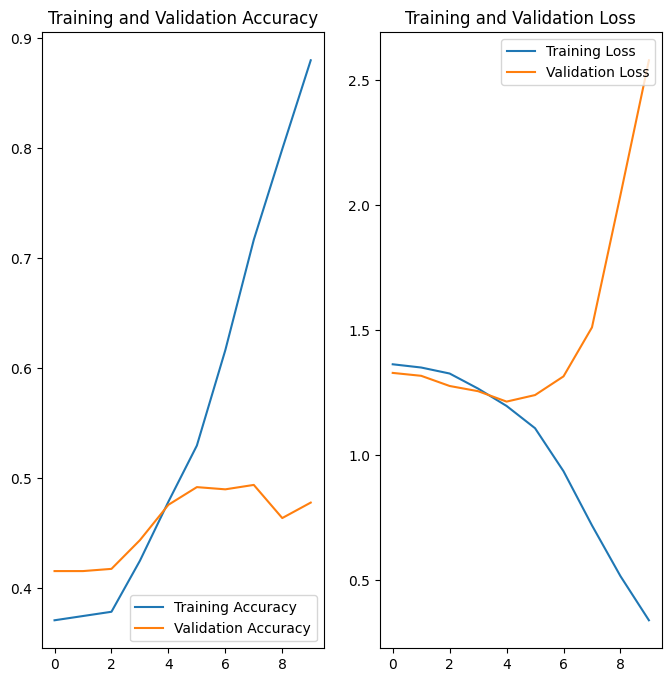

In [58]:
# Analyze Run
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(0,epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()